In [1]:
import pulp
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup


In [2]:
# Back to the first problem. Linear programming not backtracking for once !
url='https://www.janestreet.com/puzzles/january-2014-2/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]
print("Puzzle")
print("~~~~~~")
print(" ".join(y[8:10]))

Puzzle
~~~~~~
Place a digit in each of the 25 spots in the below 5×5 grid, so that each 5-digit number (leading zeroes are ok) reading across and reading down is divisible by the number outside the grid, trying to maximize the sum of the 25 numbers you enter. An example of a completed grid with sum 100 is presented on the right. Please submit your answer (along with any other comments you want to provide) as an ordered pair of your sum, and your 25 numbers, reading left to right, top to bottom.


### Puzzle details
<img src="https://www.janestreet.com/puzzles/wp-content/uploads/2014/01/niedermaier1.png" width="300" >


Solving ...
Solution took 0.0265 seconds

Sum is 205



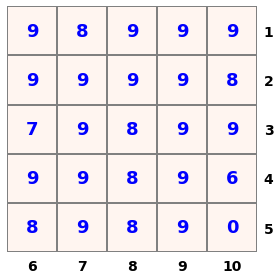

In [3]:
####################################################
# Set up problem,variables and objective function  #
####################################################

# list 1-5
nums = np.arange(1, 6)

# set up the problem as a maximisation
problem = pulp.LpProblem('SunOfSquares', pulp.LpMaximize)

# set up the various cells as a dictionary of variables
x = pulp.LpVariable.dicts('x', [(row, col) for row in nums for col in nums], lowBound = 0, upBound = 9, cat = 'Integer') 

#set up the objective function (sum of all variables)
problem += (pulp.lpSum([x[(row, col)] for row in nums for col in nums]))

#######################
# Set up constraints  #
#######################

# Row 2 is divisible by 2 - the last number is divisible by 2. 
# so x - (one of range 0-4) *2 = 0
check2 = pulp.LpVariable("check2", lowBound = 0, upBound = 9//2, cat = 'Integer')
problem += x[(2, 5)] - (2 * check2) == 0

# Row 3 is divisible by 3  - sum of numbers is divisible by 3 (5*9 = 45 /3 ... so 15)
check3 =  pulp.LpVariable("check3", lowBound = 0, upBound = 45//3, cat = 'Integer')
problem += pulp.lpSum([x[(3, col)] for col in nums]) - (3 * check3) == 0 

# Row 4 is divisible by 4  -  last 2 numbers are divisible by 4 (98/4 =24)
check4 =  pulp.LpVariable("check4", lowBound = 0, upBound = 99//4, cat = 'Integer')
problem += pulp.lpSum(10 * x[4,4] + x[4,5]) - (4 * check4) == 0 

# Row 5 is divisible by 5  -  last number is divisible by 5
check5 =  pulp.LpVariable("check5", lowBound = 0, upBound = 1, cat = 'Integer')
problem += x[(5, 5)] - (5 * check5) == 0 

# Column 1 is divisible by 6 - 2 check and 3 check
check6_2 = pulp.LpVariable("check6_2", lowBound = 0, upBound = 4, cat = 'Integer')
problem += x[(5, 1)] - (2 * check6_2) == 0 

check6_3 =  pulp.LpVariable("check6_3", lowBound = 0, upBound = 45//3, cat = 'Integer')
problem += pulp.lpSum([x[(row, 1)] for row in nums]) - (3 * check6_3) == 0 

# Column 2 is divisible by 7 ... brute force (all possible)
check7 =  pulp.LpVariable("check7", lowBound = 0, upBound = 99999//7, cat = 'Integer')
problem += pulp.lpSum([10 ** (5 - row) * x[(row, 2)] for row in nums]) - (7 * check7) == 0 

#Column 3 is divisible by 8 - last 3 numbers are divisible by 8
check8 =  pulp.LpVariable("check8", lowBound = 0, upBound = 999//8, cat = 'Integer')
problem += pulp.lpSum([100 * x[(3,3)]+10 *x[(4,3)]+ x[(5,3)]]) - (8 * check8) == 0 

#Column 4 is divisible by 9 - sum of numbers is divisible by 9
check9 =  pulp.LpVariable("check9", lowBound = 0, upBound = 45//9, cat = 'Integer')
problem += pulp.lpSum([x[(row, 4)] for row in nums]) - (9 * check9) == 0 

#Column 5 is divisible by 10 => last number is zero
problem += x[(5, 5)] == 0 

#####################
# Solve the problem #
#####################

start = time.perf_counter()
print("Solving ...")
problem.solve()
stop = time.perf_counter()
print('Solution took {:0.4f} seconds'.format((stop-start)))

###################
# Print Solution  #
###################

solution = np.zeros((5,5),dtype=int)

for row in nums:
    for col in nums:
        solution[row - 1,col - 1] = int(x[(row, col)].varValue)

print("\nSum is {}\n".format(np.sum(solution)))
        
def sol_print(solved):
    fig,ax = plt.subplots(1,1,figsize=(4,4))
    x = np.array((solved).astype('int').astype('str'))
    y = np.ones((5,5))
    ax = sns.heatmap(y,annot=x,cbar=False,cmap="Reds",fmt="",linewidths=1,center=4,linecolor="grey",xticklabels=[6,7,8,9,10], yticklabels=[1,2,3,4,5],
                     annot_kws={"fontsize":18,"weight":"bold","color":'b'})
    ax.tick_params(left=False, bottom=False,labelleft=False, labelright=True)
    plt.xticks(rotation=0,fontweight ='demi',fontsize =14)
    plt.yticks(rotation=0,fontweight ='demi',fontsize =14)
    plt.tight_layout()
        
        
sol_print(solution)

In [4]:
url='https://www.janestreet.com/puzzles/solutions/january-2014-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]

print("Solution")
print("~~~~~~~~")
print(" ".join(x[7:8]))

Solution
~~~~~~~~
The best solutions we received had a sum of 205; there were 3 entrants who managed to reach that total.   Congratulations to Tomas Vaškevičius for being randomly selected to win a Jane Street t-shirt!   His submission appears here.


### Solution
<img src="https://www.janestreet.com/puzzles/wp-content/uploads/2014/09/Jan14_Solution.png" width="600">
